# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

In [84]:
# Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

In [85]:
# Criação do DataFrame com a Base
df = pd.read_csv('Mall_Customers.csv')

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [86]:
# Análise do Tipo de Dados e Verificação de Dados Nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Não há valores nulos na base de dados.

Os tipos de dados estão coerentes.

### Análise Univariada:

In [87]:
# Verificação da Distribuição de Dados
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As variáveis CustomerID e Age são categóricas então não faz sentido haver outliers.

Na verdade, a CustomerID sequer será utilizada no modelo, portanto, iremos excluí-la a seguir.

Nesse caso, plotaremos gráfico de boxplot apenas para as variáveis Annual Income e Spending Score

In [88]:
# Exclusão da Variável CustomerID
df = df.drop('CustomerID', axis=1)

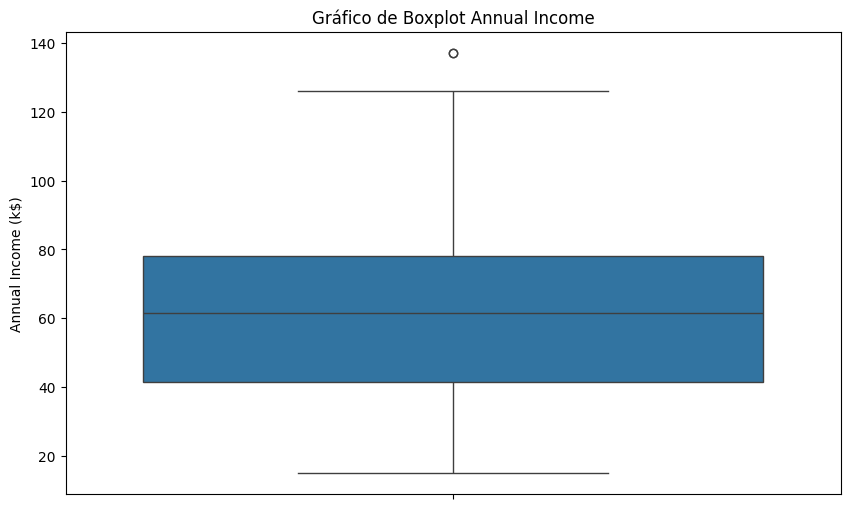

In [89]:
# Verificação de Outliers na Variável Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(y='Annual Income (k$)', data=df)
plt.title('Gráfico de Boxplot Annual Income')
plt.ylabel('Annual Income (k$)')
plt.show()

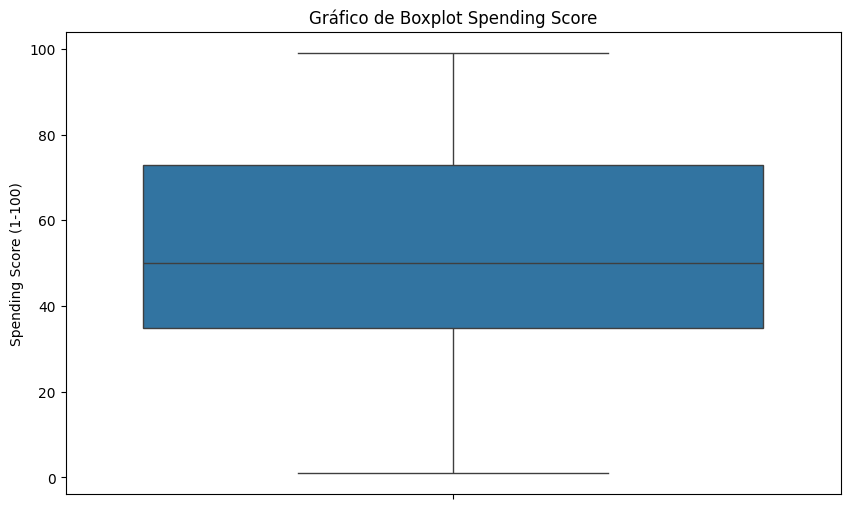

In [90]:
# Verificação de Outliers na Variável Spending Score
plt.figure(figsize=(10, 6))
sns.boxplot(y='Spending Score (1-100)', data=df)
plt.title('Gráfico de Boxplot Spending Score')
plt.ylabel('Spending Score (1-100)')
plt.show()

O gráfico acusa um outlier na variável Annual Income.

Vamos analisar a distribuição dessa variável.

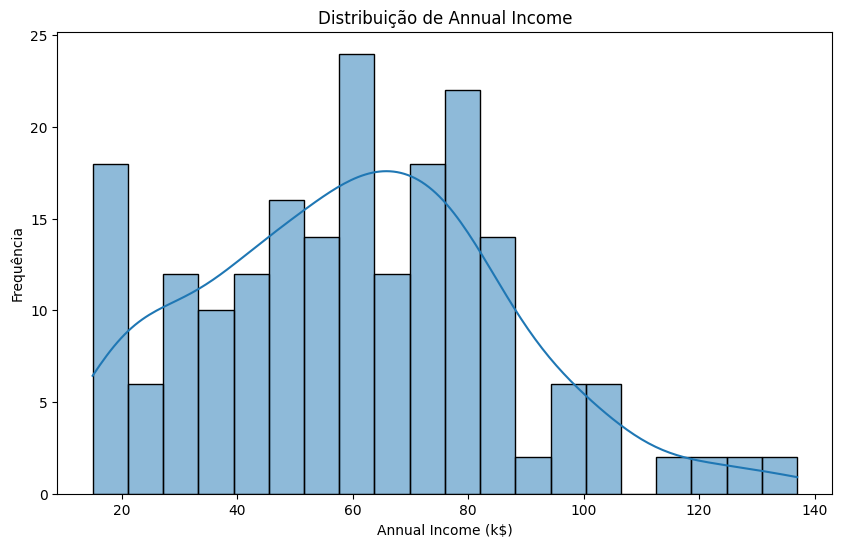

In [91]:
# Distribuição da Variável Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribuição de Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequência')
plt.show()

Por mais que tenha um ponto que se destaca, não parece haver razão para excluí-lo, visto que esse ponto parece compatível com a distribuição da variável.

Observações:
A variável possui média (60,56) e mediana (61,5) muito próximas. A distribuição é semelhante a uma normal, com concentração no centro e alguns pontos mais distantes mais acima.


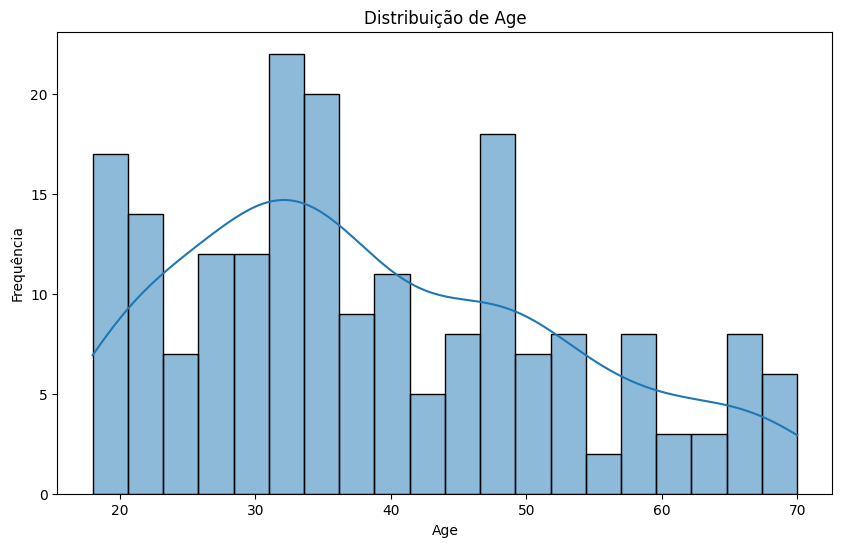

In [92]:
# Distribuição da Variável Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribuição de Age')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

É possível observar que há clientes de idades entre 20 e 70. Com pico de clientes entre 30 e 40 anos.

A média de idade, 38,85, é levemente superior à mediana, 36.

In [93]:
# Distribuição da Variável Gender
df_genero = df['Gender'].value_counts().reset_index()
df_genero.columns = ['Gênero', 'Contagem']
df_genero['Porcentagem'] = (df_genero['Contagem'] / df_genero['Contagem'].sum()) * 100

print(" Distribuição de Gender")
df_genero

 Distribuição de Gender


,Gênero,Contagem,Porcentagem
0,Female,112,56.0
1,Male,88,44.0


O gênero dos clientes é bem equilibrado, sendo as mulheres predominantes, 56%.

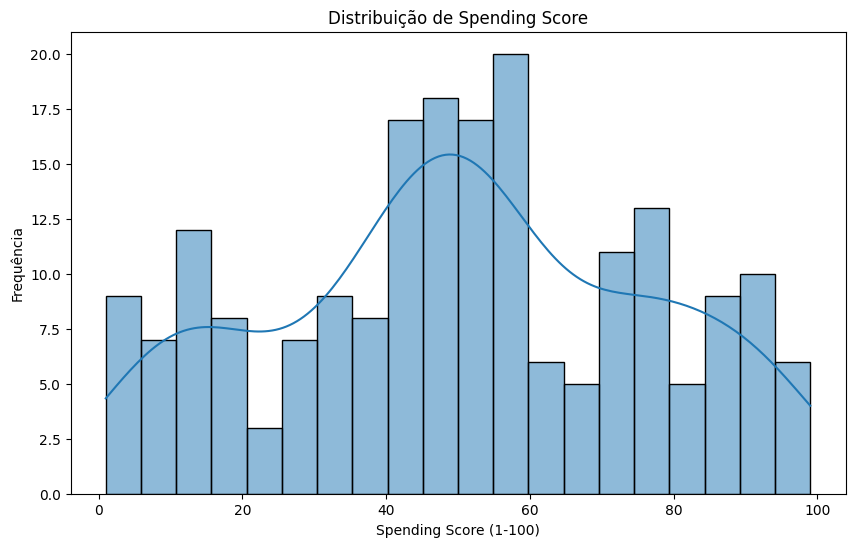

In [94]:
# Distribuição da Variável Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribuição de Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequência')
plt.show()

Semelhante à variável Annual Income, o score dos clientes possui média (50,2) e mediana (50,0) muito parecidas.

Também assemelha-se a uma distribuição normal, com centralização na média e alguns pontos nas extremidades.

### Análise Bivariada

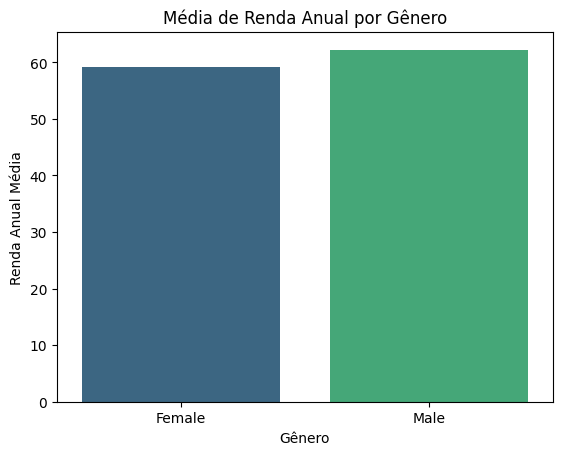

In [95]:
# Relação entre Gender e Annual Income
media_income_por_gender = df.groupby('Gender')['Annual Income (k$)'].mean().reset_index()
sns.barplot(data=media_income_por_gender, x='Gender', y='Annual Income (k$)', hue='Gender', palette='viridis')
plt.title('Média de Renda Anual por Gênero')
plt.ylabel('Renda Anual Média')
plt.xlabel('Gênero')
plt.show()

A renda média dos clientes homens é levemente superior à das clientes mulheres.

Text(0, 0.5, 'Pontuação Média de Gastos')

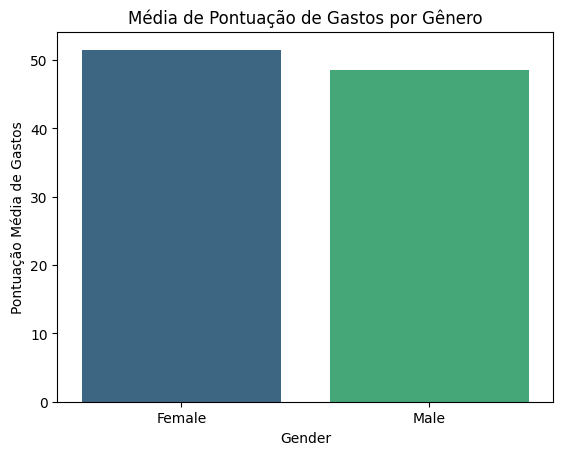

In [96]:
# Relação entre Gender e Spending Score
media_score_por_gender = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
sns.barplot(data=media_score_por_gender, x='Gender', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.title('Média de Pontuação de Gastos por Gênero')
plt.ylabel('Pontuação Média de Gastos')

Por mais que a renda dos homens seja superior, o Spending Score das clientes mulheres é levemente superior ao dos clientes do sexo masculino.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

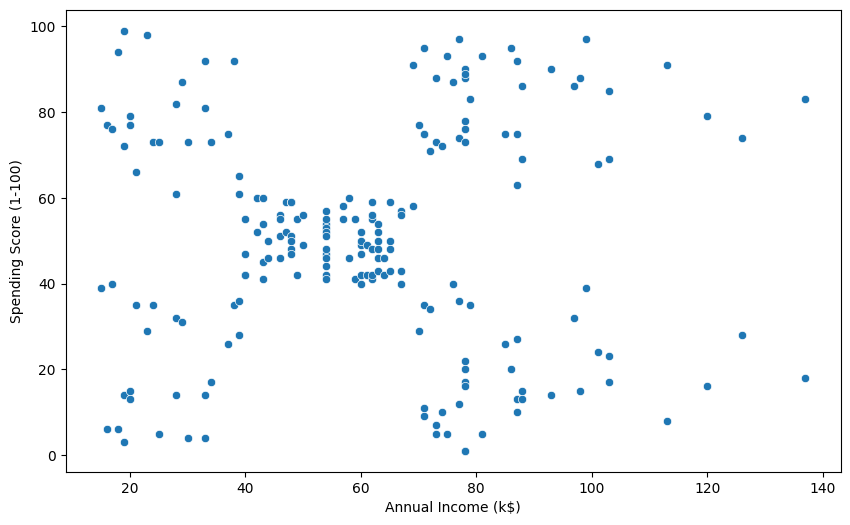

In [97]:
# Relação entre Annual Income e Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

O gráfico não nos traz tantos insights e uma relação definitiva entre as duas variáveis.

Vamos plotar a correlação entre essas variáveis .

In [98]:
# Correlação entre Annual Income e Spending Score
correlacao = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f'Correlação entre Annual Income e Spending Score: {correlacao:.2f}')

Correlação entre Annual Income e Spending Score: 0.01


De fato, a correlação entre a renda e o score é muito baixa.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

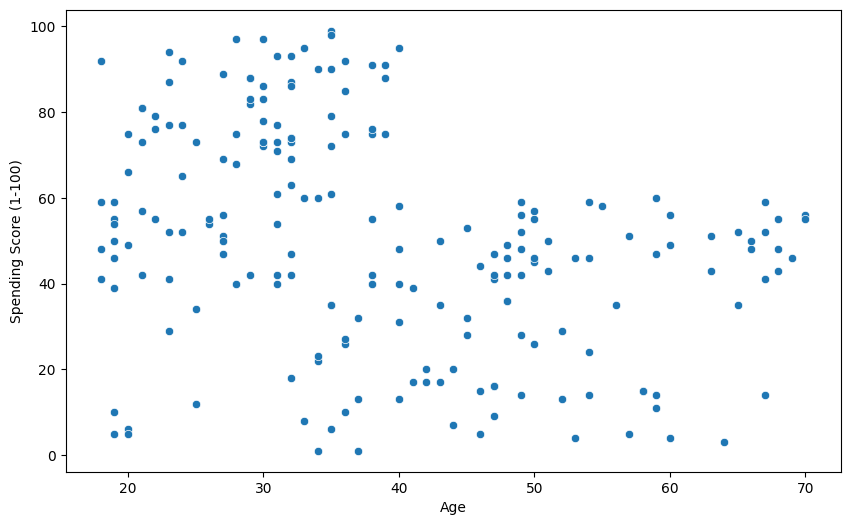

In [99]:
# Relação entre Age e Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')

Dessa vez, pode-se observar um início de padrão: os clientes mais jovens tendem a ter um score maior, já os cliente mais velhos tendem a ter um score menor.

Assim como fizemos anteriormente, vamos analisar a correlação entre Age e Spending Score.

In [100]:
# Correlação entre Age e Spending Score
correlacao = df['Age'].corr(df['Spending Score (1-100)'])
print(f'Correlação entre Age e Spending Score: {correlacao:.2f}')

Correlação entre Age e Spending Score: -0.33


Observa-se uma leve correlação negativa entre Age e Spending Score

### Tratamento Variável Gender

O algoritmo k-means não interpreta variáveis categóricas, portanto, temos que transformar a variável genêro.


A transformação será feita por meio de one-hot encoding, criando uma nova coluna chamada Genero_Male, onde será atribuído o valor 1 para registros do gênero masculino e 0 para o feminino. Após essa conversão, a coluna original Gender será excluída.

In [101]:
# Tratamento Gender
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})

df.drop('Gender', axis=1, inplace=True)

### Pairplot

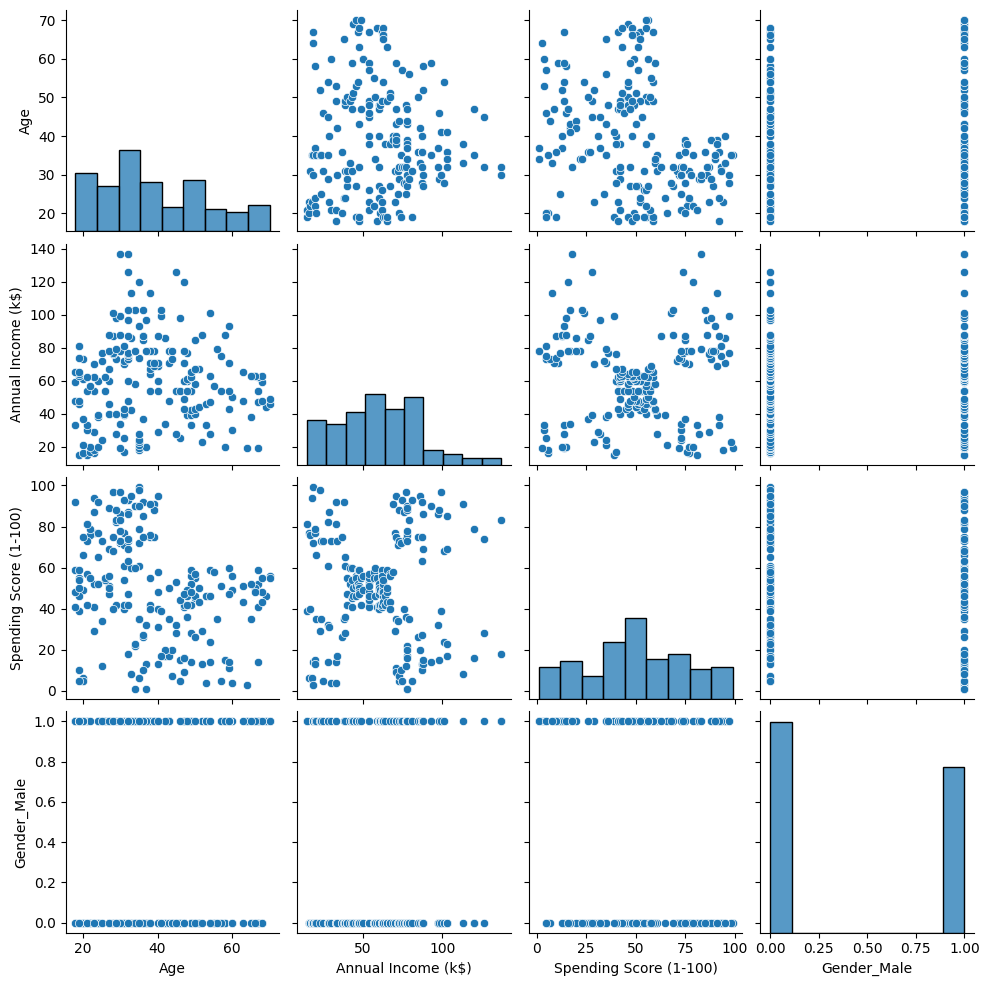

In [102]:
sns.pairplot(df)

A relação entre Annual Income e Spending Score parece indicar 5 clusters. Já a relação entre Age e Spending Score não indica tão claramente um número de clusters, porém é provável que seja 5.

Por isso, testaremos utilizando 5 clusters.

### Padronização dos Dados

In [103]:
df_padronizado = df.copy()

In [104]:
colunas_padronizar = ['Gender_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_padronizado[colunas_padronizar] = scaler.fit_transform(df_padronizado[colunas_padronizar])

In [105]:
df_padronizado

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


### Aplicação do K-Means

In [106]:
# Rodando o Modelo
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(df_padronizado)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [107]:
# Centroides
centroides = kmeans.cluster_centers_
centroides

array([[-0.44191719,  0.99158305,  1.23950275,  0.04339047],
       [-0.16988908,  1.10528137, -1.25005425,  0.0166722 ],
       [ 0.78684665, -0.43236199, -0.39327144, -0.88640526],
       [-1.00061372, -0.79536608,  0.42718095, -0.06565965],
       [ 1.21029396, -0.26238756, -0.5213181 ,  1.12815215]])

In [108]:
# Invertendo a padronização de modo a obter os centroides originais
centroides_padronizados = kmeans.cluster_centers_
centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

array([[ 2.20638074e-01,  5.26667589e+01,  9.30337042e+01,
         5.13176899e+01],
       [ 3.55669280e-01,  5.42510360e+01,  2.78098572e+01,
         5.06294572e+01],
       [ 8.30580404e-01,  3.28254503e+01,  5.02566906e+01,
         2.73671915e+01],
       [-5.66915864e-02,  2.77673363e+01,  7.17517040e+01,
         4.85086809e+01],
       [ 1.04077412e+00,  3.51938809e+01,  4.69019990e+01,
         7.92599381e+01]])

### Matriz de Dispersão

In [111]:
# Criando um df com os dados originais e  rótulos de cluster, usando x='Annual Income (k$)' e y='Spending Score (1-100)'.
df_clusters = pd.DataFrame({
    'Annual Income (k$)': df['Annual Income (k$)'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': kmeans.labels_.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(df_clusters, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.6,
                 title='Clusters por Renda e Score')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_originais[:, 2], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Annual Income (k$)', yaxis_title='Spending Score (1-100)',
                  legend_title='Cluster')
fig.show()

In [112]:
# Criando um df com os dados originais e  rótulos de cluster, usando x='Age' e y='Spending Score (1-100)'.
df_clusters = pd.DataFrame({
    'Age': df['Age'],
    'Spending Score (1-100)': df['Spending Score (1-100)'],
    'cluster': kmeans.labels_.astype(str)
})

# Plotar os pontos de dados coloridos
fig = px.scatter(df_clusters, x='Age', y='Spending Score (1-100)', color='cluster',
                 color_continuous_scale='viridis', opacity=0.6,
                 title='Clusters por Idade e Score')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_originais[:, 1], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='Age', yaxis_title='Spending Score (1-100)',
                  legend_title='Cluster')
fig.show()

O n=5 parece adequado quando analisamos a matriz de dispersão.

Clusters:


0.   Renda alta, idade baixa, score alto.
1.   Renda média/alta, idade dispersa, score baixo.
2.   Renda média, idade média, score médio.
3.   Renda baixa, idade baixa, score alto.
4.   Renda média, idade alta, score médio.


Os clusters indicam 5 perfis de clientes e pode-se observar que o score dos clientes jovens tende a ser maior, mesmo que a renda seja baixa. Isso indica que as vendas do shopping concentram-se no público mais jovem.

Uma estratégia que poderia ser adotada, visto que são os jovens que mais compram, é trazer ainda mais atrações para o público jovem, por exemplo, parcerias com influenciadores que se comunicam bastante com o público jovem. Isso faria com que mais jovens visitassem o local e comprassem.

Para o público mais velho o shopping deveria refletir se tornar mais atrativo e  converter em mais vendas, visto que, mesmo com renda alta, os clientes mais velhos possuem apenas score médio. Uma alternativa poderia ser um programa de fidelidade com brindes.

Já para os clientes com idade e renda média ofertas sazonais e brindes ou sorteios poderiam ser uma boa alternativa.